In [1]:
import sys
sys.path.append("..")

#import the jaxified ELR model
from core import ELR, utils

import jax.numpy as jnp
import jax
import numpy as np
import matplotlib.pyplot as plt
from jax import grad, jit, vmap, jacfwd, jacrev

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from scipy.special import j1
mas2rad = jnp.pi / 180.0 / 3600.0/ 1000.0

def airy(w, lam, diam):
    '''Airy function for a circular aperture, evaluated on baselines uv (m) with diameter diam (mas) at wavelength lam (m)'''
    
    r = w/lam

    d = diam*mas2rad

    return 2 * j1(jnp.pi * r * d) / (jnp.pi * r * d)

In [3]:
u, v = jnp.linspace(-330,330,64), jnp.linspace(-330,330,64)
uu, vv = np.meshgrid(np.linspace(-330,330,64),np.linspace(-330,330,64))
uvgrid = np.vstack((uu.flatten(),vv.flatten())).T

rr = ELR.ELR_Model(51,uvgrid,1e-6)


In [4]:
ft = rr(0,1,jnp.pi/4,0)

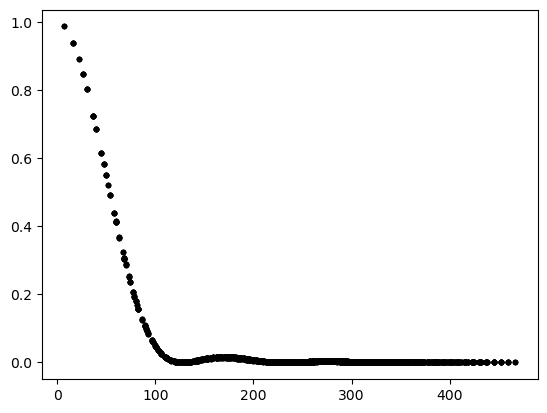

In [5]:
wgrid = np.sqrt(uvgrid[:,0]**2 + uvgrid[:,1]**2)
v2, phase = jnp.abs(ft)**2, jnp.angle(ft)
plt.plot(wgrid,v2,'k.', label='ELR Model')

In [10]:
%%timeit
ELRgrad = vmap(lambda a,b,c,d: jax.vjp(rr,a,b,c,d)[0],in_axes=[None,0,None,None])(0.0,jnp.linspace(0.001,10,10),0.0,0.0)

2.25 s ± 4.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
ELRgrad = vmap(lambda a,b,c,d: jax.vjp(rr,a,b,c,d)[0],in_axes=[None,0,None,None])(0.0,jnp.linspace(0.001,10,10),0.0,0.0)

In [12]:
ELRgrad

Array([[ 9.99974428e-01+1.58868305e-06j,  9.99975205e-01+1.53824963e-06j,
         9.99975957e-01+1.48781612e-06j, ...,
         9.99975957e-01-1.48781612e-06j,  9.99975205e-01-1.53824963e-06j,
         9.99974428e-01-1.58868305e-06j],
       [ 1.99409489e-02+1.00844296e-04j,  2.51737951e-02+9.88969663e-05j,
         2.87865908e-02+9.66062451e-05j, ...,
         2.87865908e-02-9.66062451e-05j,  2.51737951e-02-9.88969663e-05j,
         1.99409489e-02-1.00844296e-04j],
       [-4.18926446e-03+1.78558393e-04j, -8.37952708e-03+2.31490813e-04j,
        -1.04533072e-02+2.89993323e-04j, ...,
        -1.04533072e-02-2.89993323e-04j, -8.37952708e-03-2.31490813e-04j,
        -4.18926446e-03-1.78558393e-04j],
       ...,
       [-2.41470533e-03+3.34347561e-04j,  8.84067724e-04-6.28219177e-04j,
         6.73372641e-04-2.45685198e-04j, ...,
         6.73372641e-04+2.45685198e-04j,  8.84067724e-04+6.28219177e-04j,
        -2.41470533e-03-3.34347561e-04j],
       [-4.54153014e-03-2.25094058e-03j, -2.